Untuk mencatat execution time

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.54 s (started: 2020-12-22 04:51:19 +00:00)


Import pandas untuk dataframe dan numpy untuk pembulatan<br>
Import train_test_split untuk mengatur test size, scaler untuk normalisasi, dan accuracy untuk akurasi<br>
Import keras untuk CNN-nya<br>
Import pyplot untuk plotting grafik

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import time

time: 4 ms (started: 2020-12-22 01:55:36 +00:00)


Meng-import file csv dan melihat isinya


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


time: 93.7 ms (started: 2020-12-22 01:11:34 +00:00)


Mengambil hanya kolom yang bertipe numerik saja

In [ ]:
numeric = []
for col in df.drop(columns=['Year','Number of Doors']).columns:
  print(df[col].dtypes)
  if df[col].dtypes != 'object':
    numeric.append(col)
numeric

object
object
object
float64
float64
object
object
object
object
object
int64
int64
int64
int64


['Engine HP',
 'Engine Cylinders',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

time: 12.4 ms (started: 2020-12-22 01:32:33 +00:00)


Pada target (MSRP) diubah menjadi kategorikal (cheap & expensive), kemudian diubah menjadi numerik diskrit (0: cheap & 1: expensive)

In [ ]:
df_num = df[numeric]
df_num['MSRP'] = pd.qcut(df_num['MSRP'], 2, labels=['cheap', 'expensive'])
df_num['MSRP'].replace({'cheap': 0, 'expensive': 1}, inplace=True)
df_num.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
0,335.0,6.0,26,19,3916,1
1,300.0,6.0,28,19,3916,1
2,300.0,6.0,28,20,3916,1
3,230.0,6.0,28,18,3916,0
4,230.0,6.0,28,18,3916,1


time: 32.2 ms (started: 2020-12-22 01:32:36 +00:00)


Menghilangkan row yang memiliki missing value

In [ ]:
df_num.dropna(inplace=True)

time: 5.76 ms (started: 2020-12-22 01:32:39 +00:00)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Membagi data menjadi fitur (X) dan target (y)

In [ ]:
X, y = df_num.drop(columns=['MSRP']), df_num['MSRP']
X

,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


time: 26.9 ms (started: 2020-12-22 01:32:41 +00:00)


Melakukan normalisasi pada setiap fitur

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.29598309, 0.375     , 0.04093567, 0.09230769, 0.69213086],
       [0.2589852 , 0.375     , 0.04678363, 0.09230769, 0.69213086],
       [0.2589852 , 0.375     , 0.04678363, 0.1       , 0.69213086],
       ...,
       [0.2589852 , 0.375     , 0.03216374, 0.06923077, 0.0357206 ],
       [0.2589852 , 0.375     , 0.03216374, 0.06923077, 0.0357206 ],
       [0.17547569, 0.375     , 0.04093567, 0.07692308, 0.01043324]])

time: 10.1 ms (started: 2020-12-22 01:32:43 +00:00)


Membagi data menjadi train dan test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

10634 10634 1182 1182
time: 7.26 ms (started: 2020-12-22 01:32:45 +00:00)


Mengubah dataframe menjadi 3 dimensi

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train_reshaped.shape[1:3]

(5, 1)

time: 4.36 ms (started: 2020-12-22 01:39:29 +00:00)


In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(1182, 5, 1)

time: 3.52 ms (started: 2020-12-22 01:39:31 +00:00)


Menambahkan conv layer 1, conv layer 2, dan output layer pada CNN

In [ ]:
model = Sequential()
model.add(Conv1D(32, 4, input_shape=X_train_reshaped.shape[1:3], activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

model.add(Conv1D(16, 2, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 2, 32)             160       
_________________________________________________________________
dropout_28 (Dropout)         (None, 2, 32)             0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 16)             1040      
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 16)             0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 1, 16)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)              

Menambahkan early stopping untuk menghentikan iterasi ketika setelah beberapa iterasi akurasi tidak bertambah

In [ ]:
time_start = time.time()
lr = 0.01
optimizer = Adam(learning_rate=lr)

early_stopping_monitor = EarlyStopping(
    monitor='accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')

history = model.fit(X_train_reshaped, y_train,
          epochs=1000, 
          verbose=1,
          validation_data=(X_test_reshaped, y_test),
          callbacks=[early_stopping_monitor])

time_end = time.time()

print('Time elapsed : ' + str(time_end - time_start))

Epoch 1/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.5215 - accuracy: 0.7184 - val_loss: 0.3308 - val_accuracy: 0.8782
Epoch 2/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3653 - accuracy: 0.8537 - val_loss: 0.3101 - val_accuracy: 0.8841
Epoch 3/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8647 - val_loss: 0.3023 - val_accuracy: 0.8824
Epoch 4/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8575 - val_loss: 0.2989 - val_accuracy: 0.8841
Epoch 5/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8558 - val_loss: 0.3125 - val_accuracy: 0.8672
Epoch 6/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8625 - val_loss: 0.3011 - val_accuracy: 0.8697
Epoch 7/1000
333/333 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8613 - val_loss: 0.3083 - val_accuracy:

Visualisasi nilai loss untuk setiap epoch sepanjang iterasi

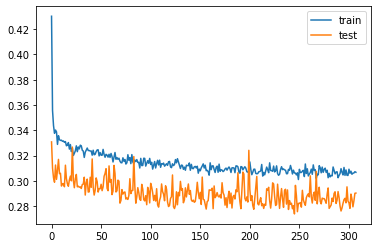

time: 174 ms (started: 2020-12-22 02:30:19 +00:00)


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Mengecek akurasi untuk data test

In [ ]:
preds = model.predict(X_test_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_test, preds)
acc

0.8798646362098139

time: 141 ms (started: 2020-12-22 02:30:22 +00:00)


Mengecek akurasi untuk data train

In [ ]:
preds = model.predict(X_train_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_train, preds)
acc

0.8857438405115666

time: 261 ms (started: 2020-12-22 02:30:24 +00:00)
